<a href="https://colab.research.google.com/github/Julimarc07/Biose-ales_Juliana_Mart-nez/blob/main/Practica4_Juliana_martinez_y_Allison_Rojas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 4**

In [1]:
!pip install hrv-analysis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 5.9 MB/s eta 0:00:00


In [2]:
!pip install neurokit2 detectors hrv-analysis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.8/616.8 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.2/126.2 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 3.9 MB/s eta 0:00:00


In [3]:
!pip install neurokit2 detectors

**ECG**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
from google.colab import files

In [7]:
uploaded = files.upload()
ecg = pd.read_csv('emg.csv')
ecg.head()

Saving emg.csv to emg.csv


,2.000000000000000000e+00
0,322.0
1,291.0
2,356.0
3,307.0
4,145.0


In [9]:
signal = ecg.iloc[:, 0]
fs = 120
print(f"Longitud de la señal: {len(signal)} muestras")


Longitud de la señal: 3999 muestras


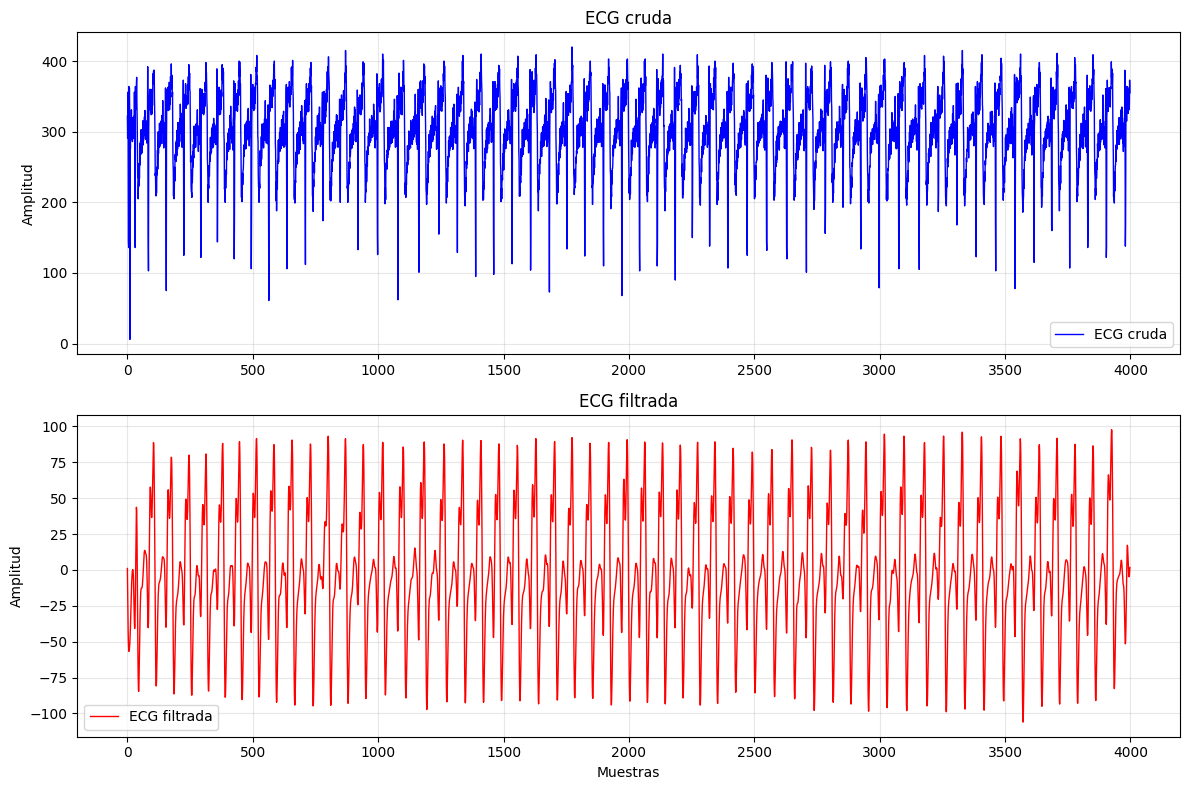

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parámetros
fs = 120 # Frecuencia de muestreo estimada
ecg_signal = ecg.iloc[:, 0].values

# Remover componente DC
ecg_detrended = ecg_signal - np.mean(ecg_signal)

#Bandpass Butterworth ajustado 0.5–30 Hz
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

ecg_filtered = butter_bandpass_filter(ecg_detrended, 0.5, 10, fs)

# Graficar con escalas comparables
plt.figure(figsize=(12, 8))

# Señal original
plt.subplot(2, 1, 1)
plt.plot(ecg_signal, color='blue', linewidth=1, label="ECG cruda")
plt.title("ECG cruda")
plt.ylabel("Amplitud")
plt.grid(True, alpha=0.3)
plt.legend()

# Señal filtrada
plt.subplot(2, 1, 2)
plt.plot(ecg_filtered, color="red", linewidth=1, label="ECG filtrada")
plt.title("ECG filtrada")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()



In [11]:
import astropy.stats
try:
    from astropy.timeseries import LombScargle
    astropy.stats.LombScargle = LombScargle
except ImportError:
    pass

In [12]:
from hrvanalysis import get_time_domain_features

In [13]:
!pip install py-ecg-detectors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.5/554.5 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43804 sha256=3393fd8115a3ba9715e3f7c6333258e2378cd04ae33c92fdbd1aeecf093a5eb8
  Stored in directory: /root/.cache/pip/wheels/b5/56/88/04643e9be584a6018e10aae5789d98225995da3e89513c3f30
Successfully built gatspy


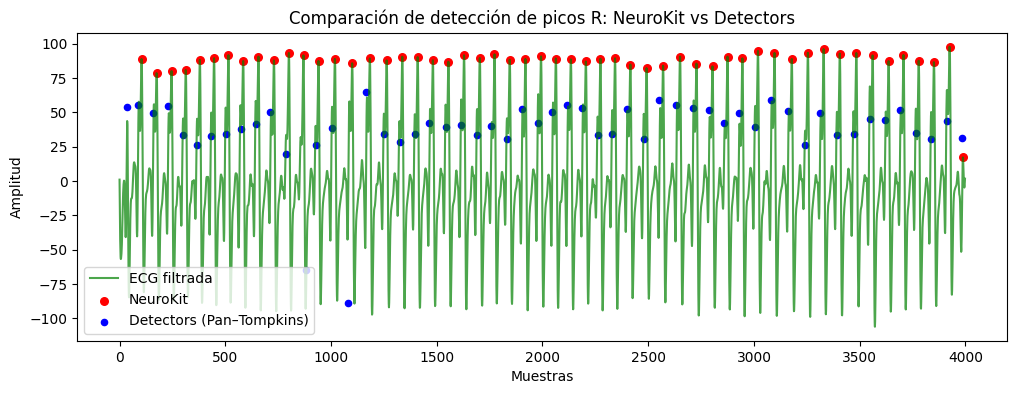

🔹 Picos R detectados por NeuroKit: 54
🔹 Picos R detectados por Detectors: 55

HRV (NeuroKit2):


,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,610.691824,35.256135,NaN,NaN,NaN,NaN,NaN,NaN,27.541732,27.780291,...,41.666667,1.280099,583.333333,641.666667,5.660377,35.849057,525.0,700.0,7.571429,62.5



HRV (hrvanalysis - dominio del tiempo):
    mean_nni      sdnn      sdsd  nni_50  pnni_50  nni_20  pnni_20     rmssd  \
0  61.069182  3.525614  2.751188       0      0.0       0      0.0  2.754173   

   median_nni  range_nni      cvsd     cvnni     mean_hr       max_hr  \
0   60.833333       17.5  0.045099  0.057731  985.682737  1142.857143   

       min_hr     std_hr  
0  857.142857  55.974207  


In [14]:
from ecgdetectors import Detectors
# Método NeuroKit
ecg_cleaned = nk.ecg_clean(ecg_filtered, sampling_rate=fs, method="neurokit")
signals_nk, info_nk = nk.ecg_peaks(ecg_cleaned, sampling_rate=fs)
rpeaks_nk = info_nk["ECG_R_Peaks"]
# Parámetros
fss = 100 # Frecuencia de muestreo estimada
ecg_signall = ecg.iloc[:, 0].values
# Remover componente DC
ecg_detrendedd = ecg_signall - np.mean(ecg_signall)
#Bandpass Butterworth ajustado 0.5–10 Hz
def butter_bandpass_filter(data, lowcut, highcut, fss, order=4):
  nyquist = 0.5 * fs
  low = lowcut / nyquist
  high = highcut / nyquist
  b, a = butter(order, [low, high], btype='band')
  y = filtfilt(b, a, data)
  return y
ecg_filtered1 = butter_bandpass_filter(ecg_detrendedd, 0.5, 20, fss)

#  Método Detectors (Pan–Tompkins)
detector = Detectors(fss)
rpeaks_det = detector.pan_tompkins_detector(ecg_filtered1)

# Graficar comparación
plt.figure(figsize=(12,4))
plt.plot(ecg_filtered, label="ECG filtrada", color="green", alpha=0.7)
plt.scatter(rpeaks_nk, ecg_filtered[rpeaks_nk], color="red", label="NeuroKit", s=30)
plt.scatter(rpeaks_det, ecg_filtered1[rpeaks_det], color="blue", label="Detectors (Pan–Tompkins)", s=20)
plt.title("Comparación de detección de picos R: NeuroKit vs Detectors")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

print(f"🔹 Picos R detectados por NeuroKit: {len(rpeaks_nk)}")
print(f"🔹 Picos R detectados por Detectors: {len(rpeaks_det)}")


# CÁLCULO DE HRV EN EL DOMINIO DEL TIEMPO

# HRV con NeuroKit
if len(rpeaks_nk) > 3:
    hrv_nk = nk.hrv_time(info_nk, sampling_rate=fs)
    print("\nHRV (NeuroKit2):")
    display(hrv_nk)
else:
    print("No hay suficientes picos R para calcular HRV con NeuroKit.")

# HRV con hrvanalysis
if len(rpeaks_nk) > 3:
    rr_intervals = np.diff(rpeaks_nk) / fs * 100 # en milisegundos
    features_time = get_time_domain_features(rr_intervals)
    print("\nHRV (hrvanalysis - dominio del tiempo):")
    print(pd.DataFrame([features_time]))
else:
    print("No hay suficientes picos R para calcular HRV con hrvanalysis.")